# PROJECT 3. 고양이 수염 스티커 만들기
## 1) 사진 준비하기
스티커를 붙히기 위해서 사진이 필요합니다. 얼굴이 포함된 사진을 준비합니다.   
**opencv로 준비한 사진을 읽어오고, matplotlib로 화면에 사진을 출력합니다.**  

> opencv : Opne Source Computer Vision Library의 약자로, 컴퓨터 비전(이미지 혹은 영상 처리)에 대한 라이브러리 입니다.  
matplolib : 데이터를 시각화해주는 라이브러리입니다.  

*※ 주의할 점 : **opencv**는 이미지 채널을 **BGR** 순으로 사용하고, **matplotlib**는 이미지 채널을 **RGB** 순으로 사용합니다.*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
*그래서 matplotlib로 이미지를 출력하기 위해서 이미지 채널을 RGB 순으로 바꿔야 합니다.*

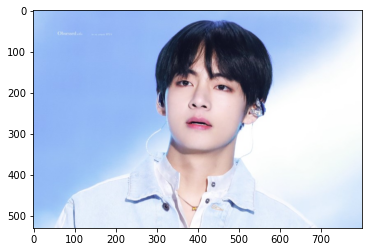

In [1]:
# 준비한 사진 읽기
import cv2    # 이미지 채널을 BGR 순으로 사용
import matplotlib.pyplot as plt    # 이미지 채널을 RGB 순으로 사용
import numpy as np
import os

# 이미지를 읽는 함수
def read_img(img):    # img = 이미지 파일의 이름
    my_img_path = os.getenv("HOME") + "/aiffel/exploration/camera_sticker/images/{}".format(img)   # 사진이 경로 저장하기
    img_bgr = cv2.imread(my_img_path, 1)    # openCV로 이미지 읽기, 1 : 컬러로 읽음
    img_bgr = cv2.resize(img_bgr, (img_bgr.shape[1] - img_bgr.shape[1]%10,img_bgr.shape[0] - img_bgr.shape[0]%10))    # 사진크기 Resize하기 (1의 자리수를 0으로 처리)   
    img_show_bgr = img_bgr.copy()    # 출력용 이미지 별도 저장하기
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
   
    return img_bgr, img_rgb, img_show_bgr

img_bgr, img_rgb, img_show_bgr = read_img("V_front.jpg")    # 이미지를 읽는 함수 불러오기

plt.imshow(img_rgb)    # matplotlib로 이미지 출력하기
plt.show()    # 화면에 이미지 출력하기

## 2) 얼굴 검출 (face detection)
Object detection 기술을 이용해서 사진 속 얼굴의 위치를 찾습니다.  
**dlib의 HOG** 를 사용하여 얼굴을 검출합니다. ( = 사진 속 얼굴의 위치 **bounding box** 로 표시하기) 

>dlib : 이미지 처리 및 기계학습, 얼굴인식 등을 할 수 있는 c++로 개발된 고성능의 라이브러리 입니다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
dlib는 RGB로 이미지를 입력받습니다.  
HOG : 객체 감지를 위해 컴퓨터 비전 및 이미지 처리에 사용되는 기능입니다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
픽셀값의 변화로 파악할 수 있는 이미지 밝기 변화의 방향을 gradient로 표현하고, 이로 부터 객체의 형태를 찾아낼 수 있습니다.

bouding box 좌표 : rectangles[[(324, 139) (510, 325)]]


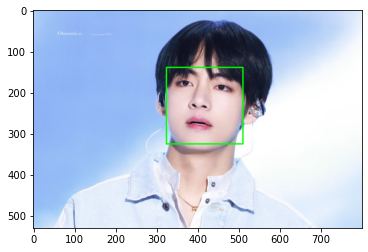

In [2]:
# 얼굴 검출하기
import dlib

# 사진 속 얼굴 bounding box로 표시하는 함수
def detect_face(img_rgb, img_show_bgr):    # img_rgb = 얼굴 검출(HOG)을 위한 이미지, img_show_bgr = bounding box 표시할 이미지
    detector_hog = dlib.get_frontal_face_detector()    # 얼굴 검출을 위한 detector 선언하기
    dlib_rects = detector_hog(img_rgb, 1)    # bounding box의 위치 (image, num of img pyramid)
    '''
    이미지를 upsamplig 방법을 통해 크기를 키우는 것을 이미지 피라미드라고 합니다.
    이미지 피라미드에서 얼굴을 다시 검출하면 작게 촬영된 얼굴을 크게 볼 수 있기 때문에 더 정확한 검출이 가능합니다.
    '''
    
    print("bouding box 좌표 :", dlib_rects)   # 찾은 얼굴영역 좌표

    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show_bgr, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)    # img_show_bgr 사진에 bounding box 표시하기    
        # (image, start, end, color, thinkness)
        '''
        cv2.rectangle : 사각형 그리는 함수
        img : 그림을 그릴 이미지
        start : 사각형 사진 꼭짓점 좌표
        end : 사각형 종료 꼭짓점 좌표
        color : 선 색상 (BGR)
        thickness : 선의 두께
        lineType : 선 그리기 형식 (cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택)
        '''
    return dlib_rects

dlib_rects = detect_face(img_rgb, img_show_bgr)    # 사진 속 얼굴 bounding box로 표시하는 함수 불러오기
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
plt.imshow(img_show_rgb)    # matplotlib로 이미지 출력하기
plt.show()    # 화면에 이미지 출력하기


## 3) 얼굴 랜드마크 (face landmark) 검출
스티커를 세밀하고 자연스럽게 적용하기 위해서 눈, 코, 입과 같은 이목구비의 위치를 아는 것이 중요합니다.  
**랜드마크(landmark) 모델** 을 이용하여 **이목구비의 위치를 찾습니다.**  

> 랜드마크(landmark) :이목구비의 위치를 찾아내는 기술입니다.    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
face detection의 결과물인 bounding box로 잘라낸 얼굴 이미지를 사용합니다.  


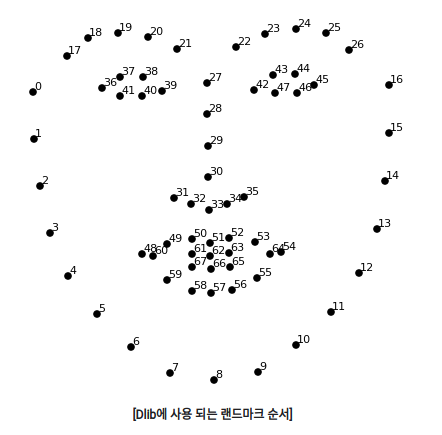  



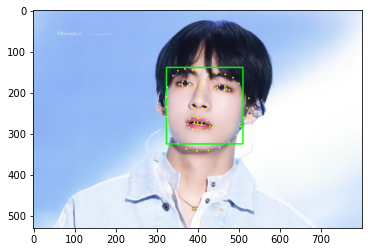

In [3]:
# 얼굴 랜드마크하기

# bounding box 속 얼굴의 이목구비를 랜드마크로 표시하는 함수
def face_landmark(dlib_rects, img_rgb, img_show_bgr):    # dlib_rects = bounding box 좌표, img_rgb = 랜드마크를 구하기 위한 이미지, img_show_bgr = 랜드마크를 표시할 이미지
    model_path = os.getenv('HOME')+'/aiffel/exploration/camera_sticker/models/shape_predictor_68_face_landmarks.dat'    # 저장한 landmark 모델 불러오기
    landmark_predictor = dlib.shape_predictor(model_path)    # landmark 모델 선언

    list_landmarks = []    # 68개(0~67)의 이목구비 위치를 저장하는 리스트
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)    # 이목구비 위치 구하기
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))    # 이목구비 위치를 (x,y)형태로 저장합니다.
        list_landmarks.append(list_points)    # 이목구비 위치를 리스트에 저장합니다.


    # 랜드마크가 적용된 이미지 출력하기
    for landmark in list_landmarks:
        for idx, point in enumerate(list_points):
            #print(idx, point)
            cv2.circle(img_show_bgr, point, 2, (0, 255, 255), -1)    ## img_show_bgr 사진에 랜드마크 표시하기
            # (image, center, radian, color, thickness)
            '''
            cv2.cirlce : 원 그리는 함수
            image : 그림을 그릴 이미지
            center : 원의 중심 좌표
            radian : 반지름
            color : 선 색상 (BGR)
            thickness : 선의 두께, -1이면 원 안쪽을 채움
            '''
    
    return list_landmarks

list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)    # bounding box 속 얼굴의 이목구비를 랜드마크로 표시하는 함수 불러오기
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸기
plt.imshow(img_show_rgb)    # matplotlib로 이미지 출력하기
plt.show()    # 화면에 이미지 출력하기


## 4) 스티커 적용 위치 확인하기
사진 속 얼굴에 고양이 수염을 붙히기 위해서는 스티커를 적용할 위치를 알아야합니다.  
**랜드마크로 추출한 이목구비의 위치를 활용** 하여 스티커를 적용할 위치를 찾습니다.  
랜드마크를 기준으로 스티커는 **"코 가운데"** 에 붙이면 될 것 같습니다.  

1. 스티커 위치  

$$ {x} = {x}_{30} $$
$$ {y} = {y}_{30} $$  

2. 스티커 크기  

$$ {width} = ({x}_{30} - {x}_{2}) * {2} $$  
$$ {height} = ({y}_{48} - {y}_{30}) * 2  $$  
<br/>

<img src="./landmark_location.png"  width="700">

In [4]:
# 이미지에 적용시킬 스티커 좌표 확인하기

# 이미지에 적용시킬 스티커의 좌표를 찾는 함수
def sticker_position(dlib_rects, list_landmarks):    # dlib_rects = bounding box 좌표, list_landmarks = 이목구비 위치 
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
        # x = landmark[30][0]    # 왕관 스티커를 붙힐 x좌표
        # y = landmark[30][1] - dlib_rect.width()//2    # 왕관 스티커를 붙힐 y좌표

        x = landmark[30][0]    # 고양이 스티커의 중심 x좌표
        y = landmark[30][1]    # 고양이 스티커의 중심 y좌표

        # w = dlib_rect.width()    # bounding box의 너비
        # h = dlib_rect.height()    # bouding box의 높이
        
        w = (landmark[30][0] - landmark[2][0]) * 2    # 고양이 스티커의 너비
        h = (landmark[48][1] - landmark[30][1]) * 2    # 고양이 스티커의 높이
    
    return x, y, w, h

x, y, w, h = sticker_position(dlib_rects, list_landmarks)    # 이미지에 적용시킬 스티커의 좌표를 찾는 함수 불러오기
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

Image center (x,y) : (402,218)
Image size (w,h) : (156,116)


## 5) 스티커 적용하기
고양이 수염 스티커를 적용시킬 위치와 크기를 활용하여 사진 속 얼굴에 고양이 수염을 붙힙니다.  
이미지의 시작점은 top-left 좌표이기 때문에, 고양이 수염 스티커의 좌표를 center 에서 top-left 로 바꿔준 뒤에 스티커를 적용합니다.  

<img src="./sticker_location.png"  width="700">

top-left (x,y) : (324,160)


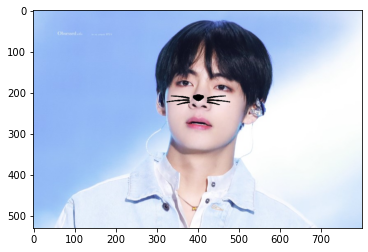

In [5]:
# 고양이 스티커 이미지를 읽어서 적용하기

# 사진 속 얼굴에 고양이 수염을 붙히는 함수
def attach_sticker(x, y, w, h, img_bgr, sticker):    # x, y, w, h = 고양이 수염 스티커의 위치와 크기, img_bgr = 고양이 수염을 붙힐 이미지, sticker = 고양이 수염 스티커의 파일의 이름 
    sticker_path = os.getenv('HOME')+'/aiffel/exploration/camera_sticker/images/{}'.format(sticker)    # 고양이 수염 스티커가 저장된 위치
    img_sticker = cv2.imread(sticker_path)    # openCV로 고양이 스티커 이미지 읽기
    img_sticker = cv2.resize(img_sticker, (w,h))    # 고양이 스티커 이미지 resize 하기

    # 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표 입니다.
    refined_x = x - w // 2    # left
    refined_y = y - h // 2    # top
    print ('top-left (x,y) : (%d,%d)'%(refined_x, refined_y))
    
    # 스티커 이미지의 y축이 음수인 경우 (스티커 이미지가 위쪽을 벗어난 경우)
    if (refined_y < 0):
        img_sticker = img_sticker[-refined_y:]    # 원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
        refined_y = 0    # top 의 y 좌표값을 원본 이미지의 경계 값으로 수정하기
       
    # 스티커 이미지의 y축이 원본 이미지의 최대 y축보다 큰 경우 (스티커 이미지가 아래쪽을 벗어난 경우)
    if ((refined_y + h) > img_bgr.shape[0]):
        img_sticker = img_sticker[:img_bgr.shape[0]-refined_y]    # 원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
   
    # 스티커 이미지의 x축이 음수인 경우 (스티커 이미지가 왼쪽을 벗어난 경우)
    if (refined_x < 0): 
        img_sticker = img_sticker[:, -refined_x:, :]    # 원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
        refined_x = 0    # left 의 x 좌표값을 원본 이미지의 경계 값으로 수정하기
    
    # 스티커 이미지의 x축이 원본 이미지의 최대 x축보다 큰 경우 (스티커 이미지가 오른쪽을 벗어난 경우)
    if ((refined_x + w) > img_bgr.shape[1]):
        img_sticker = img_sticker[:, :img_bgr.shape[1]-refined_x, :]     # 원본 이미지의 범위를 벗어난 스티커 부분을 제거하기
    
    # 원본 이미지에 스티커 적용하기
    sticker_area = img_bgr[refined_y:refined_y+h, refined_x:refined_x+w]    # 원본 이미지에 스티커를 적용시킬 부분
    img_bgr[refined_y:refined_y+h, refined_x:refined_x+w] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    # 스티커 이미지색이 255인 부분(하얀색)은 원본 이미지 색(sticker_area)을 칠하고,
    # 스티커 이미지색이 255가 아닌 부분(하얀색이외의 모든색)은 스티커 이미지색(img_sticker)을 칠한다.
    # (255,255,255) == 하얀색

attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")    # 사진 속 얼굴에 고양이 수염을 붙히는 함수 불러오기
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))    # maplotlib 로 출력하기 위해 이미지 채널을 RGB 순으로 바꾸고, matplotlib로 이미지 출력하기
plt.show()    # 화면에 이미지 출력하기


## 6) 다양한 사진에 스티커 적용해보기
### - 측면을 바라보고 있는 사진

bouding box 좌표 : rectangles[[(349, 231) (617, 498)]]
Image center (x,y) : (543,371)
Image size (w,h) : (480,134)
top-left (x,y) : (303,304)


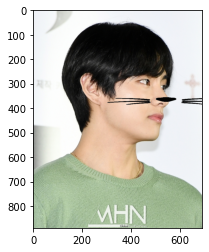

In [6]:
# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_side1.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크하기
list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 이미지에 적용시킬 스티커 좌표 확인하기
x, y, w, h = sticker_position(dlib_rects, list_landmarks)
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

# 고양이 스티커 이미지를 읽어서 적용하기
attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

옆을 바라보고 있는 사진에 고양이 수염 스티커를 적용하면, 굉장히 이상하게 적용됩니다.  
제 생각에는 고양이 수염 스티커의 크기에 문제가 생겨서 발생한 것 같습니다.  
이를 해결하기 위해서, **고양이 수염 스티커의 크기** 를 아래와 같이 **재정의** 합니다. 
<br/>  
<img src="./side.png"  width="400">  
> 오른쪽을 바라보는 경우, 코를 중심으로 오른쪽 볼면적 보다 왼쪽 볼면적이 더 넓습니다.  
볼면적이 더 좁은쪽(오른쪽)을 기준으로, 스티커 이미지 너비 = (코 중심 위치와 bounding box 오른쪽 위치 사이의 거리)x2 로 정의해줍니다.  

> 반대로 왼쪽을 바라보는 경우, 코를 중심으로 왼쪽 볼면적보다 오른쪽 볼면적이 더 넓습니다.  
볼면적이 더 좁은쪽(왼쪽)을 기준으로, 스티커 이미지 너비 = (코 중심 위치와 bounding box 왼쪽 위치 사이의 거리)x2 로 정의해줍니다.


bouding box 좌표 : rectangles[[(349, 231) (617, 498)]]
Image center (x,y) : (543,371)
Image size (w,h) : (148,134)
top-left (x,y) : (469,304)


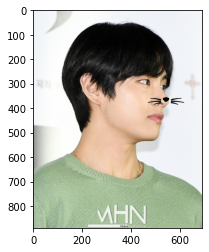

In [7]:
# 이미지에 적용시킬 스티커 좌표 확인하기
def sticker_position(dlib_rects, list_landmarks):
    
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks): 
        # x = landmark[30][0]    # 왕관 스티커를 붙힐 x좌표
        # y = landmark[30][1] - dlib_rect.width()//2    # 왕관 스티커를 붙힐 y좌표

        x = landmark[30][0]    # 고양이 스티커의 중심 x좌표
        y = landmark[30][1]    # 고양이 스티커의 중심 y좌표

        # w = dlib_rect.width()    # bounding box의 너비
        # h = dlib_rect.height()    # bouding box의 높이
        
        w1 = landmark[30][0] - landmark[2][0]    # 왼쪽 볼 면적
        w2 = landmark[14][0] - landmark[30][0]    # 오른쪽 볼 면적
        
        # 왼쪽을 쳐다보는 사진
        if abs(w1) < abs(w2):
            w = (landmark[30][0] - dlib_rect.left()) * 2    # 고양이 스티커의 너비
        # 오른쪽을 쳐다보는 사진
        else:
            w = (dlib_rect.right() - landmark[30][0]) * 2    # 고양이 스티커의 너비
                     
        h = (landmark[48][1] - landmark[30][1]) * 2    # 고양이 스티커의 높이
    
    return x, y, w, h

# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_side1.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크하기
list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 이미지에 적용시킬 스티커 좌표 확인하기
x, y, w, h = sticker_position(dlib_rects, list_landmarks)
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

# 고양이 스티커 이미지를 읽어서 적용하기
attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

위와 같이 고양이 수염 스티커의 크기를 재정의해보니, 예쁜 고양이 수염이 그려졌습니다.  
위의 방법으로 다른 사진에도 적용시켜 보도록 하겠습니다.  

bouding box 좌표 : rectangles[[(262, 98) (448, 284)]]
Image center (x,y) : (321,179)
Image size (w,h) : (118,112)
top-left (x,y) : (262,123)


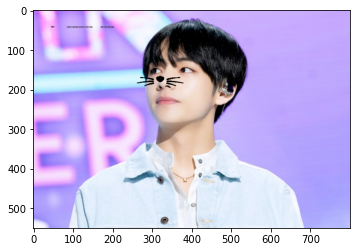

In [8]:
# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_side2.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크하기
list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 이미지에 적용시킬 스티커 좌표 확인하기
x, y, w, h = sticker_position(dlib_rects, list_landmarks)
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

# 고양이 스티커 이미지를 읽어서 적용하기
attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

bouding box 좌표 : rectangles[[(191, 192) (414, 415)]]
Image center (x,y) : (261,303)
Image size (w,h) : (140,134)
top-left (x,y) : (191,236)


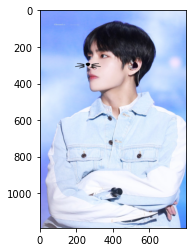

In [9]:
# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_side3.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크하기
list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 이미지에 적용시킬 스티커 좌표 확인하기
x, y, w, h = sticker_position(dlib_rects, list_landmarks)
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

# 고양이 스티커 이미지를 읽어서 적용하기
attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

bouding box 좌표 : rectangles[[(419, 241) (740, 562)]]
Image center (x,y) : (659,398)
Image size (w,h) : (162,184)
top-left (x,y) : (578,306)


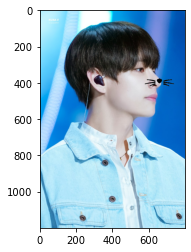

In [10]:
# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_side4.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크하기
list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 이미지에 적용시킬 스티커 좌표 확인하기
x, y, w, h = sticker_position(dlib_rects, list_landmarks)
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

# 고양이 스티커 이미지를 읽어서 적용하기
attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

측면을 바라보고 있는 사진에 고양이 수염을 붙히는 것을 모두 성공하였습니다. :)

### - 멀리서 촬영한 사진

bouding box 좌표 : rectangles[[(287, 135) (349, 198)]]
Image center (x,y) : (319,165)
Image size (w,h) : (64,34)
top-left (x,y) : (287,148)


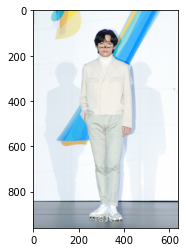

In [11]:
# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_full.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크하기
list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 이미지에 적용시킬 스티커 좌표 확인하기
x, y, w, h = sticker_position(dlib_rects, list_landmarks)
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

# 고양이 스티커 이미지를 읽어서 적용하기
attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

멀리서 촬영한 사진에 고양이 수염을 붙히는 것을 성공하였습니다. :)

### - 옆으로 누워서 촬영한 사진

In [12]:
# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_lying.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 얼굴 랜드마크하기
list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

# 이미지에 적용시킬 스티커 좌표 확인하기
x, y, w, h = sticker_position(dlib_rects, list_landmarks)
print ('Image center (x,y) : (%d,%d)'%(x,y))
print ('Image size (w,h) : (%d,%d)'%(w,h))

# 고양이 스티커 이미지를 읽어서 적용하기
attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

bouding box 좌표 : rectangles[]


UnboundLocalError: local variable 'x' referenced before assignment

**옆으로 누워서 촬영한 사진** 은 얼굴을 인식하지 못하여 에러가 난 것을 확인하실 수 있습니다. ( = **face detection 불가능** )  
*(누워서 촬영한 사진은 왜 인식을 못하는걸까요...? ㅠㅠ)*  
이를 해결하기 위해서, **얼굴 인식을 하지 못하는 사진** 을 얼굴을 인식할 때까지 **사진을 회전** 합니다.  
<br/>
<img src="./lying.png"  width="900">

bouding box 좌표 : rectangles[]
bouding box 좌표 : rectangles[]
bouding box 좌표 : rectangles[]
bouding box 좌표 : rectangles[[(27, 241) (348, 562)]]
Image center (x,y) : (213,407)
Image size (w,h) : (270,180)
top-left (x,y) : (78,317)


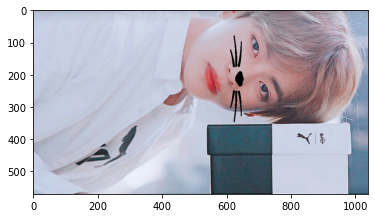

In [13]:
# matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)
# dst = cv2.warpAffine(src, matrix, (width, height))

# 준비한 사진 읽기
img_bgr, img_rgb, img_show_bgr = read_img("V_lying.jpg")

# 얼굴 검출하기
dlib_rects = detect_face(img_rgb, img_show_bgr)

# 얼굴 인식을 하지 못하는 경우, 사진 회전하기
count = 0
while(len(dlib_rects) == 0):
    # 이미지를 회전시켜도 얼굴 인식을 하지 못하는 경우
    if count == 4:
        break
    
    img_rgb = cv2.rotate(img_rgb, cv2.ROTATE_90_CLOCKWISE)    # 시계방향으로 90도 회전하기
    img_show_bgr = cv2.rotate(img_show_bgr, cv2.ROTATE_90_CLOCKWISE)    # 시계방향으로 90도 회전하기
    img_bgr = cv2.rotate(img_bgr, cv2.ROTATE_90_CLOCKWISE)    # 시계방향으로 90도 회전하기
    count = count + 1
    
    dlib_rects = detect_face(img_rgb, img_show_bgr)
img_show_rgb =  cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

if count == 4:     # 얼굴인식을 못한 경우
    print("얼굴을 인식하지 못하였습니다. 다른사진을 이용해주세요.")
else:     # 얼굴인식을 한 경우
    # 얼굴 랜드마크하기
    list_landmarks = face_landmark(dlib_rects, img_rgb, img_show_bgr)
    img_show_rgb = cv2.cvtColor(img_show_bgr, cv2.COLOR_BGR2RGB)

    # 이미지에 적용시킬 스티커 좌표 확인하기
    x, y, w, h = sticker_position(dlib_rects, list_landmarks)
    print ('Image center (x,y) : (%d,%d)'%(x,y))
    print ('Image size (w,h) : (%d,%d)'%(w,h))

    # 고양이 스티커 이미지를 읽어서 적용하기
    attach_sticker(x, y, w, h, img_bgr, "cat-whiskers.png")
    if count == 0:    # 회전 0번한 경우
        plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        plt.show()
    elif count == 1:    # 회전 1번한 경우, 반시계로 회전 1번 하기
        img_bgr = cv2.rotate(img_bgr, cv2.ROTATE_90_COUNTERCLOCKWISE)
        plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        plt.show()
    elif count == 2:    # 회전 2번한 경우, 반시계로 회전 2번 하기
        img_bgr = cv2.rotate(img_bgr, cv2.ROTATE_180_COUNTERCLOCKWISE)
        plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        plt.show()
    elif count == 3:    # 회전 3번한 경우, 시계로 회전 1번 하기
        img_bgr = cv2.rotate(img_bgr, cv2.ROTATE_90_CLOCKWISE)
        plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("스티커 적용에 문제가 생겼습니다.")


옆으로 누워서 촬영한 사진에 고양이 수염을 붙히는 것을 성공하였습니다. :)  

## [ 결과 - 루브릭]
#### 1. 자기만의 카메라앱 기능 구현을 완수하였다.
- 원본에 스티커 사진을 정상적으로 합성하였습니다.

#### 2. 스티커 이미지를 정확한 원본 위치에 반영하였다.
- 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력하였습니다.

#### 3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.
- 측면사진에 스티커를 적용했을 때의 문제점을 분석하여, 정상적으로 스티커를 적용하였습니다.
- 옆으로 누워서 촬영한 사진에 스티커를 적용했을 때의 문제점을 분석하여, 정상적으로 스티커를 적용하였습니다.

## [ 느낀점 ]
HOG 함수와 랜드마크 기술을 사용하여 얼굴에 고양이 수염을 적용시켜봤습니다.  
저는 이 프로젝트를 통해서 뷰티앱(SODA, SNOW 등)이 어떻게 얼굴을 보정해주고, 스티커를 적용시키는지에 대해 조금은 알게 된 것 같습니다.  
그리고 CV에 대해 더 공부하면 저도 그런 뷰티앱을 만들 수 있을 것 같다는 생각이 들었고, 만들어보고 싶다는 생각도 들었습니다.  
저의 욕심일 수도 있겠지만, 아이펠 과정이 끝났을 때 뷰티앱을 만들 수 있는 수준까지 성장하고 싶다는 생각 또한 들었습니다.  
*CV 정말 재밌네요!! :)*  

이 프로젝트를 마친 후, 저의 느낀점을 적어보면 아래와 같습니다.  
> **"뷰티앱! 나도 한번 만들어보고 싶다!"**